## IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## importing the dataset

In [14]:
data = pd.read_csv('C:/Users/Admin/Documents/training dataset/student_data.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## checking the dataset (shape,null and duplicate values,info and its desciption)

In [15]:
data.shape

(1000, 8)

In [20]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [24]:
data.duplicated().sum()
#data.nunique()

np.int64(0)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## checking some info about the dataset

In [26]:
print("Categories in 'race_ethnicity' column: ",end=" ")
print(data['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' column: ",end=" ")
print(data['parental_level_of_education'].unique())
print("Categories in 'test_preparation_course' column: ",end=" ")
print(data['test_preparation_course'].unique())
print("Categories in 'lunch' column: ",end=" ")
print(data['lunch'].unique())
print("Categories in 'gender' column: ",end=" ")
print(data['gender'].unique())

Categories in 'race_ethnicity' column:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' column:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'test_preparation_course' column:  ['none' 'completed']
Categories in 'lunch' column:  ['standard' 'free/reduced']
Categories in 'gender' column:  ['female' 'male']


In [50]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']

In [52]:
print(f"numerical features : {numerical_features}")
print(f"categorical features: {categorical_feature}")

numerical features : ['math_score', 'reading_score', 'writing_score']
categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding "Total score" and "Average" columns

In [55]:
data["Total_score"] = data["writing_score"] + data["math_score"] + data["reading_score"]
data["Average"] = (data["Total_score"] / 3).round(2)

In [56]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


## lets do some visualization

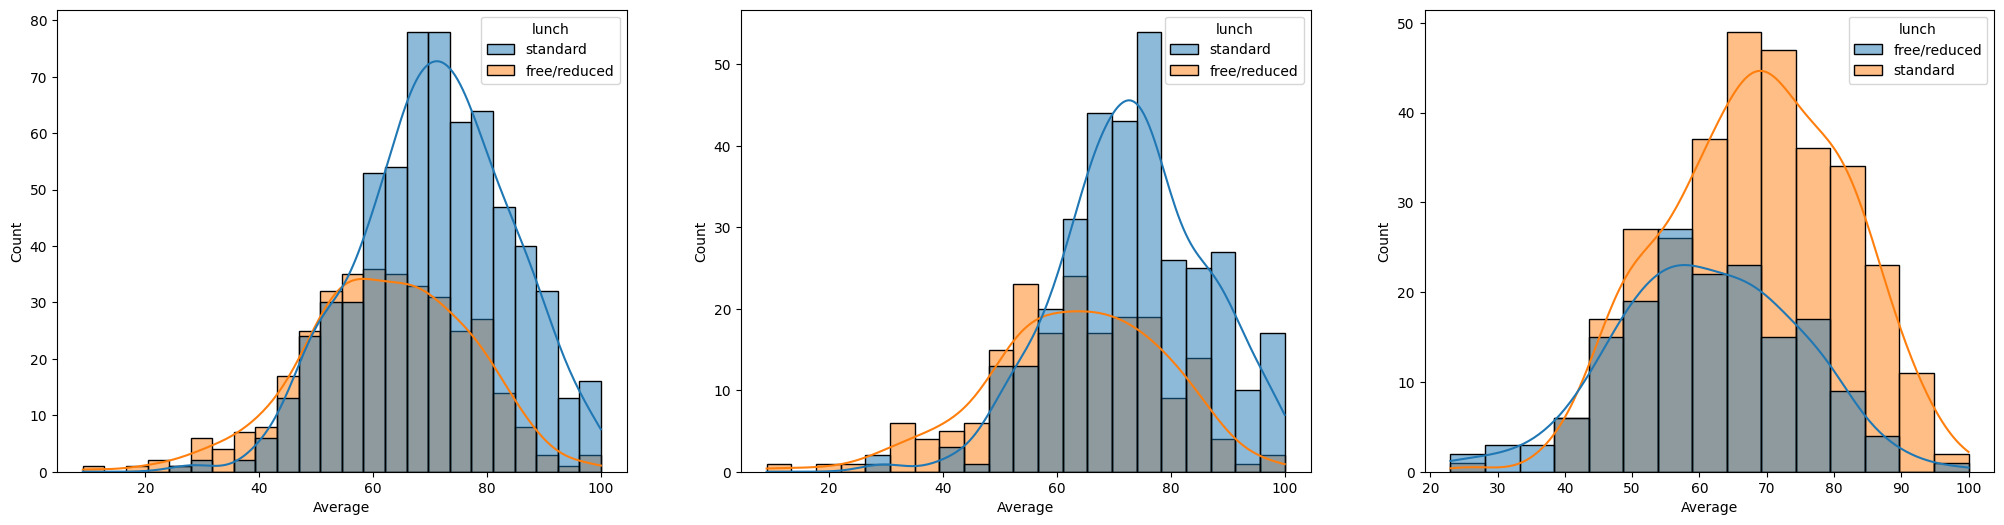

In [69]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=data,x="Average",kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=data[data.gender=="female"],x="Average",kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=data[data.gender =='male'],x="Average",kde=True,hue='lunch')
plt.show()

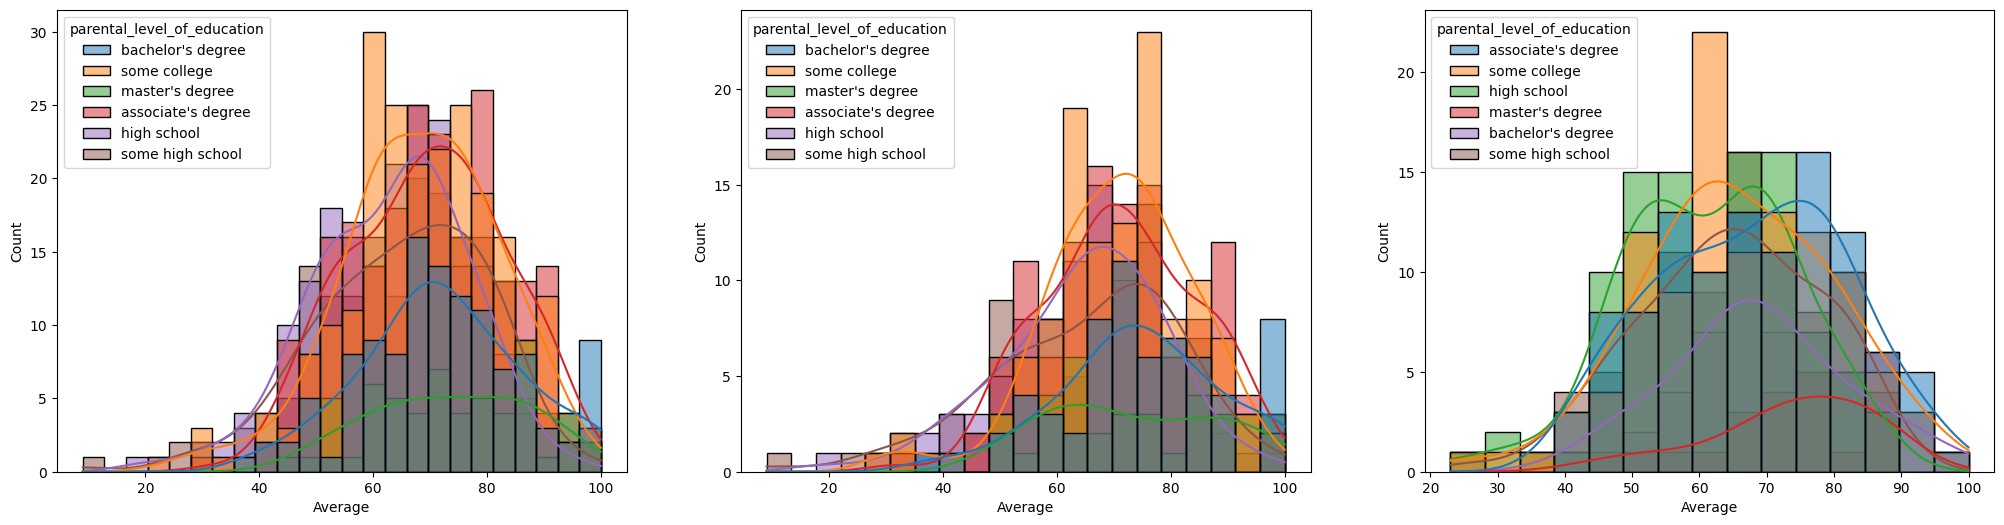

In [68]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=data,x="Average",kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=data[data.gender=="female"],x="Average",kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=data[data.gender =='male'],x="Average",kde=True,hue='parental_level_of_education')
plt.show()

## maximum score of students in all three subjects

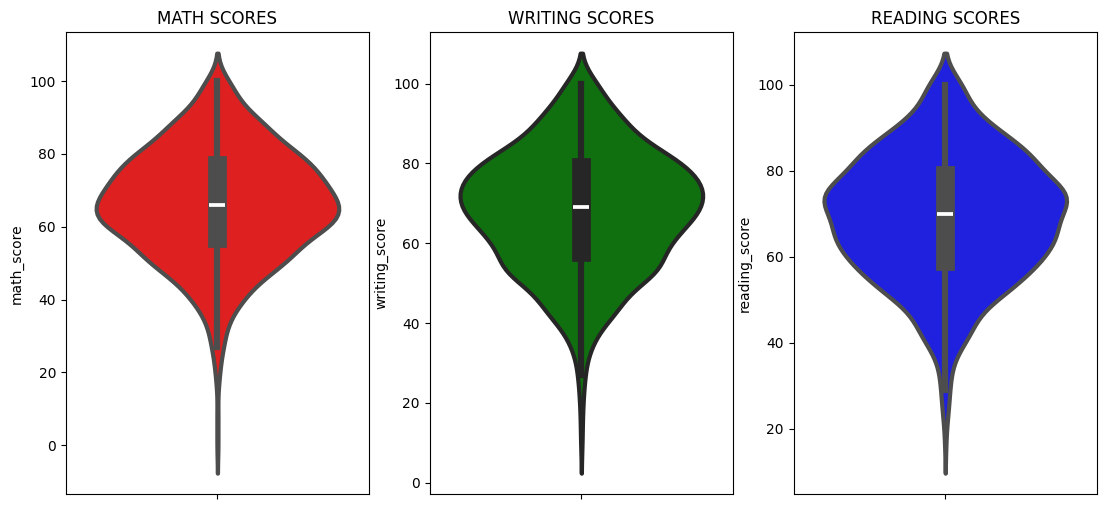

In [80]:
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
plt.title("MATH SCORES")
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title("WRITING SCORES")
sns.violinplot(y='writing_score',data=data,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title("READING SCORES")
sns.violinplot(y='reading_score',data=data,color='blue',linewidth=3)
plt.show()


## Analysing on the base of Gender (male/female)

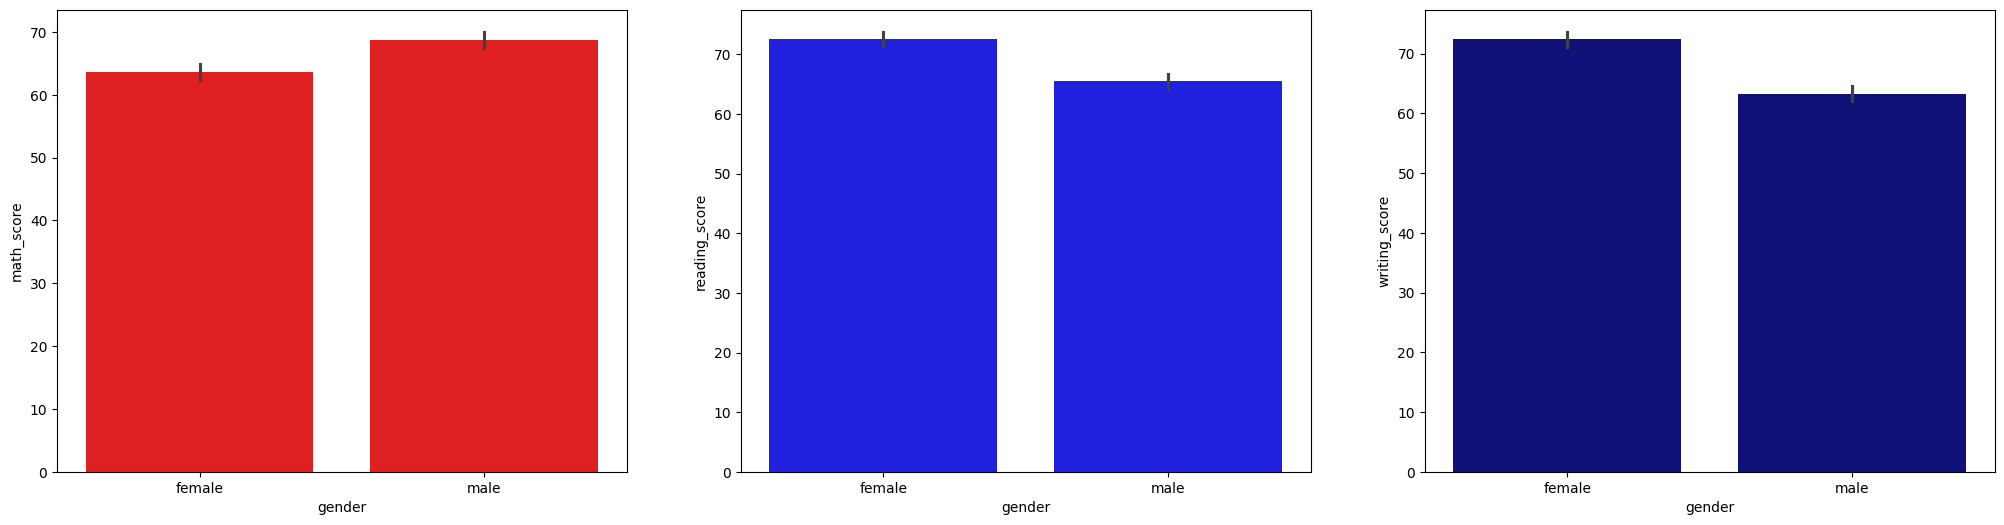

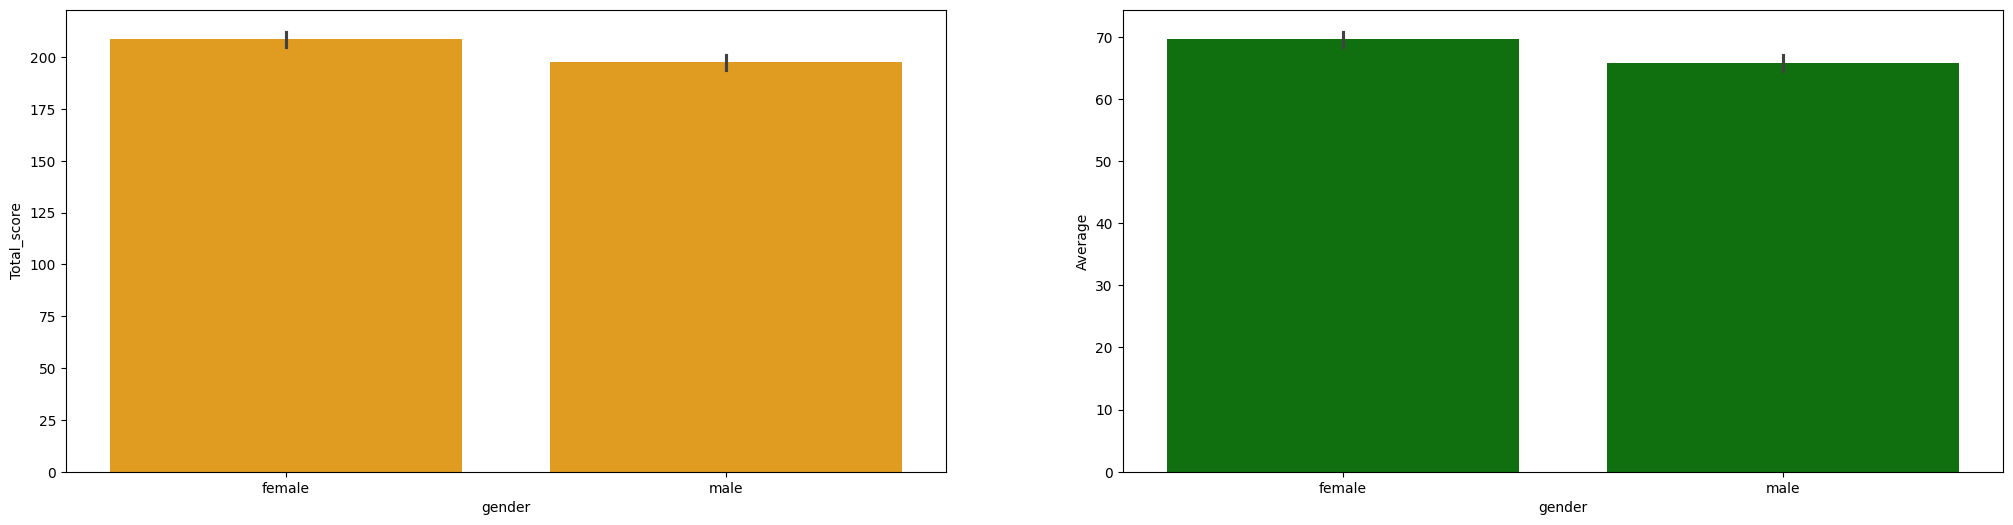

In [104]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.barplot(data,x="gender",y="math_score",color='red')
plt.subplot(132)
sns.barplot(data,x="gender",y="reading_score",color='blue')
plt.subplot(133)
sns.barplot(data,x="gender",y="writing_score",color='darkblue')
plt.subplots(1,2,figsize=(25,6))
plt.subplot(121)
sns.barplot(data,x="gender",y="Total_score",color='orange')
plt.subplot(122)
sns.barplot(data,x="gender",y="Average",color='green')
plt.show()


## Analysing and checking the dataset has completed